In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

%matplotlib inline

In [13]:
conn = pyodbc.connect(r"driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;")
conx_string = "driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;"
query2 = "SELECT TOP (1000) [PRS_START_TIME],[PRS_END_TIME],[PRS_STATE],[PRS_BUSINESS_KEY],try_convert(float, RIGHT(PRS_Business_key, len(PRS_BUSINESS_KEY) - charindex(':', prs_business_key))) as Business_Key, try_convert(float, DATEDIFF(MILLISECOND, PRS_START_TIME,PRS_END_TIME)) as Process_Time FROM [ORCHESTRA].[dbo].[ORC_PROCESS_STATE];"
SQLquery = pd.read_sql_query(query2, conn)
conx = pyodbc.connect(conx_string);
cursor = conx.cursor();
cursor.execute(query2);
data = cursor.fetchall()

In [14]:
df = pd.DataFrame(SQLquery, columns=['PRS_STATE','Business_Key', 'Process_Time'])
df = df.drop(31, axis=0)
type(df)

pandas.core.frame.DataFrame

In [34]:
clf = IsolationForest(contamination=.10)
clf.fit(df)
predictions = clf.predict(df)

In [35]:
(predictions>0).mean()

0.8975155279503105

In [36]:
outliers = np.where(predictions<0)
type(outliers[0])

numpy.ndarray

In [37]:
#MinMaxPreProcessing

df2 = df
#df3['Labels'] = kmeans.labels_.tolist()

scaler = MinMaxScaler()

scaler.fit(df2[['Process_Time']])
df2['Process_Time'] = scaler.transform(df2[['Process_Time']])


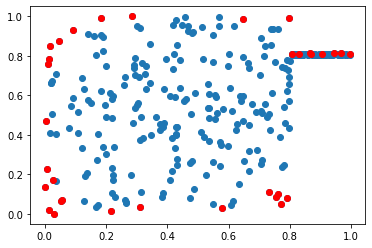

In [38]:
plt.scatter(df2['Business_Key'], df2['Process_Time'])
j = 0
for i in outliers[0]:
    #print(i)
    #as row 31 was deleted due to being an outlier, it has to be corrected
    if i > 30:
        j = i + 1
    plt.scatter(df2['Business_Key'][j], df2['Process_Time'][j], color='red')
